# Time Series Classification Pipeline



- In this project,I am going to construct a pipeline which performs K-NN Classifier on 5 different time series data taken from http://www.timeseriesclassification.com/http://www.timeseriesclassification.com/. The data sets chosen for the project are Earthquakes , ECG200, Fish , Large Kitchen Appliences and Mixed Shapes Small datasets. The desired pipeline is expected to do *Cross Validation on K value on train data and to decide paramaters of representations*, to construct best model and then test it on the test data based on performance measures. After looking the data set briefly, I manipulated them in a similar way and let the pipeline show me the results of the different techniques based on accuracy measures. 

In [65]:
# Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from scipy.spatial import distance
sns.set(rc={'figure.figsize':(12,9)})

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
from dtaidistance import dtw
from pyts.approximation import SymbolicAggregateApproximation
from sklearn import preprocessing

### Pipeline
- From Now on I will continue with the pipeline to reduce the number of steps in computation and ease of use

In [77]:


def pipeline(train_data,test_data,train_classes,test_classes):
    
    ## Arrays to keep results of models
    cv_results = []
    scores = []
    performances = []
    
#---------- Raw Time Series- Euclidean Distance - CV 
    

    # create dataset
    X_train = train_data
    y_train = train_classes

    K_vals = [1,3,5]
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for Raw-Euclidean:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    print("Best K for Raw-Euclidean:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
#---------- Raw Time Series- Euclidean Distance - Model Performance 
            

    K_value = K_vals[np.argmax(scores)] #Best K_Value passed to model
 
    X_test = test_data
    y_test = test_classes
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value, metric = 'euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # evaluate model
    performances.append(["Euclidean | Raw ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with Euclidiean Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
    
#---------- Raw Time Series- Dynamic Time Warping - CV
    
    # DTW Matrix
    
    distance1 = dtw.distance_matrix_fast(train_data.values)
    X = distance1
    y = train_classes
    scores = []
    K_vals = [1,3,5]
    for i in K_vals:
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'precomputed')
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
    cv_results.append(["Best K for Raw-DTW:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    print("Best K for Raw-DTW:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- Raw Time Series- Dynamic Time Warping - Model Performance 


    # DTW Matrix
    X_train = dtw.distance_matrix_fast(train_data.values)
    X_test = dtw.distance_matrix_fast(test_data.values)

    
    K_value = K_vals[np.argmax(scores)] #Best K_Value passed to model
    
    
    y_train = train_classes
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # evaluate model
    performances.append(["Raw | DTW ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with DTW Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
#---------- Raw Time Series- Manhattan Distance - CV
    
    X_train = train_data
    y_train = train_classes
    X_test = test_data
    y_test = test_classes
    K_vals = [1,3,5]
    scores = []
    
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for Raw-Manhattan:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for Raw-Manhattan:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
#---------- Raw Time Series- Manhattan Distance -  Model Performance 
            

    K_value = K_vals[np.argmax(scores)] #Best K_Value passed to model
    X_train = train_data
    y_train = train_classes
    X_test = test_data
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value, metric = 'manhattan')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["Manhattan | Raw ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with Manhattan Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
#---------- Raw Time Series- Minkowski Distance - CV
    
    
    X_train = train_data
    y_train = train_classes
    X_test = test_data
    y_test = test_classes
    K_vals = [1,3,5]
    scores = []
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = float('inf'))
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for Raw-Minkowski:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for Raw-Minkowski:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
#---------- Raw Time Series- Minkovski Distance - Model Performance
            

    K_value = K_vals[np.argmax(scores)]
    X_train = train_data
    y_train = train_classes
    X_test = test_data
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value, metric = 'minkowski', p = float('inf'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["Minkowski | Raw ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with Minkowski Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
#---------- PCA Applied Time Series- Euclidean Distance - CV
    
    
    #PCA application 
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = 4)
    new_data = pca_new.fit_transform(data)
    
    # create dataset
    
    X= new_data
    y = train_classes
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for PCA-Euclidean:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for PCA-Euclidean", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    K_value = K_vals[np.argmax(scores)]
#---------- PCA Applied Time Series- Euclidean Distance - Parameter Tuning
    
    X_train = train_data.values
    y_train = train_classes
    scores = []
    PCA_vals = [1,2,3,4,5]
    
    for i in PCA_vals:
        
        #PCA Application for the selected number of PCA Component  
        new_data = []
        data = X_train
        pca_new = PCA(n_components = i)
        new_data = pca_new.fit_transform(data)
        X = new_data
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best PCA Component Number:", PCA_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    

    
#---------- PCA Applied Time Series- Euclidean Distance - Model Performance
    
    #PCA Application to both train and test data 
    
    # Train Data
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_train = new_data
    y_train = train_classes
    
    # Test Data 
    new_data = []
    data = test_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_test = new_data
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value,  metric = 'euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["Euclidean | PCA ", metrics.accuracy_score(y_test,y_pred)])
    
    # report performance
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_value}-NN with PCA-Euclidean Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
#---------- PCA Applied Time Series- Dynamic Time Warping - CV
    
    
    #PCA Application to train data 
    new_data = []
    data = train_data.values
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X = new_data
    
    
    # DTW application 
    
    distance1 = dtw.distance_matrix_fast(X)
    X = distance1
    y = train_classes
   
    K_vals = [1,3,5]
    scores = []
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'precomputed') #precomputed parameter is passed since we are using DTW
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for PCA-DTW:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    print("Best K for PCA-DTW", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)]) 
    K_value =  K_vals[np.argmax(scores)]
    
#---------- PCA Applied Time Series- Dynamic Time Warping - Model Performance
    
    # PCA Application to test data
    
    new_data = []
    data = test_data.values
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X2 = new_data
    
    # DTW Application
    distance2 = dtw.distance_matrix_fast(X2)
    
    X_train = distance1
    y_train = train_classes
    X_test = distance2
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value,metric = 'precomputed')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["DTW | PCA ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    # report performance
    print(f"""
    Model : '{K_value}-NN with PCA-DTW Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
#---------- PCA Applied Time Series- Manhattan Distance - CV
    
    #PCA application 
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = 4)
    new_data = pca_new.fit_transform(data)
    
    # create dataset
    X = new_data
    y = train_classes
    
    scores = []
    K_vals = [1,3,5]
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for PCA-Manhattan:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    print("Best K for PCA-Manhattan", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- PCA Applied Time Series- Manhattan Distance - Parameter Tuning    

    K_value = K_vals[np.argmax(scores)]
    X_train = train_data.values
    y_train = train_classes
    scores = []
    PCA_vals = [1,2,3,4,5]
    
    for i in PCA_vals:
        #PCA application to find best number of PCA component
        
        new_data = []
        data = X_train
        pca_new = PCA(n_components = i)
        new_data = pca_new.fit_transform(data)
        X = new_data
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=K_value, metric = 'manhattan')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y_train, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best PCA Component Number:", PCA_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    

#---------- PCA Applied Time Series- Manhattan Distance - Model Performance     

    #PCA application to Train Data
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_train = new_data
    y_train = train_classes
    
    #PCA application to Test Data   
    
    new_data = []
    data = test_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_test = new_data
    y_test = test_classes
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value,  metric = 'manhattan')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["Manhattan | PCA ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_value}-NN with PCA-Manhattan Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
    
#---------- PCA Applied Time Series- Minkowski Distance - CV
    
    #PCA application 
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = 4)
    new_data = pca_new.fit_transform(data)
    
    # create dataset
    X = new_data
    y = train_classes
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i,  metric = 'minkowski', p = float('inf'))
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for PCA-Minkowski:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for PCA-Minkowski", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- PCA Applied Time Series- Minkowski Distance - Parameter Tuning



    K_value =  K_vals[np.argmax(scores)]
    X_train = train_data.values
    y_train = train_classes
    scores = []
    PCA_vals = [1,2,3,4,5]
    
    for i in PCA_vals:
        
        #PCA application to find best number of PCA component 
        new_data = []
        data = X_train
        pca_new = PCA(n_components = i)
        new_data = pca_new.fit_transform(data)
        X = new_data
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=K_value,  metric = 'minkowski', p = float('inf'))
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best PCA Component Number:", PCA_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    

#---------- PCA Applied Time Series- Minkowski Distance - Model Performance


    #PCA application to Train Data
    
    
    new_data = []
    data = train_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_train = new_data
    y_train = train_classes
    
    #PCA application to Test Data
    
    new_data = []
    data = test_data
    pca_new = PCA(n_components = PCA_vals[np.argmax(scores)]+1)
    new_data = pca_new.fit_transform(data)
    X_test = new_data
    y_test = test_classes
    
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value,  metric = 'minkowski', p = float('inf'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # evaluate model
    performances.append(["Minkowski | PCA ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_value}-NN with PCA-Minkowski Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
#---------- SAX Applied Time Series- Euclidean Distance - Parameter Tuning 

    
    BIN_vals = [2,3,4,5,6]
    scores = []
    for i in BIN_vals:
        
        # SAX transformation
        X_train = train_data.values
        n_bins = i
        sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
        X_train = sax.fit_transform(X_train)
        
        #Encoding the SAX valeus to put into model
        sax = np.zeros(X_train.shape)
        for z in range(np.min(list(X_train.shape))):
            le = preprocessing.LabelEncoder()
            le.fit(X_train[z])
            X = le.transform(X_train[z])
            sax[z] = X
            
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=5,  metric = 'minkowski', p = 2)
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, sax, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best Bin Value Number:", BIN_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- SAX Applied Time Series- Euclidean Distance - CV
    
    
    
    # SAX transformation
    X_train = train_data
    y = train_classes
    n_bins =  BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X = sax
    
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for SAX-Euclidean:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for SAX-Euclidean", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    

    
#---------- SAX Applied Time Series- Euclidean Distance - Model Performance


    
    # SAX transformation to train data
    
    X_train = train_data
    y = train_classes
    n_bins = BIN_vals[np.argmax(scores)]
    
    #Encoding the SAX valeus to put into model
    
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X_train = sax

    # SAX transformation to test data
    
    X_test = test_data
    y_test = test_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_test = sax.fit_transform(X_test)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_test.shape)
    for z in range(np.min(list(X_test.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_test[z])
        X = le.transform(X_test[z])
        sax[z] = X
    X_test = sax
    
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_vals[np.argmax(scores)],   metric = 'minkowski', p =2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    # evaluate model
    performances.append(["Euclidean | SAX ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    # report performance
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with SAX-Euclidean Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
    
#---------- SAX Applied Time Series- Dynamic Time Warping - CV 
    
    # SAX transformation
    
    X_train = train_data
    y = train_classes
    n_bins =BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    
    #Encoding the SAX valeus to put into model
    
    X_train = sax.fit_transform(X_train)
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X = sax
    
    # DTW application 
    distance1 = dtw.distance_matrix_fast(X)
    X = distance1
    y = train_classes
    
    
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'precomputed')
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for SAX-DTW:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for SAX-DTW", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- SAX Applied Time Series- Dynamic Time Warping - Model Performance 
    
    # SAX transformation to train data

    X_train = train_data
    y_train = train_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X_train = sax
    
    # DTW application 

    distance1 = dtw.distance_matrix_fast(X_train)
    X_train = distance1

    # SAX transformation to test data
    X_test = test_data
    y_test = test_classes
    n_bins = BIN_vals[np.argmax(scores)]
    
    #Encoding the SAX valeus to put into model
    
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_test = sax.fit_transform(X_test)
    sax = np.zeros(X_test.shape)
    for z in range(np.min(list(X_test.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_test[z])
        X = le.transform(X_test[z])
        sax[z] = X
    X_test = sax

    # DTW application
    
    distance2 = dtw.distance_matrix_fast(X_test)
    X_test = distance2
    
    # create model
    
    model = KNeighborsClassifier(n_neighbors= K_vals[np.argmax(scores)], metric = 'precomputed')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    
    performances.append(["DTW | SAX ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with SAX-DTW Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
#---------- SAX Applied Time Series- Manhattan Distance - Parameter Tuning


    scores = []
    BIN_vals = [2,3,4,5,6]
    
    for i in BIN_vals:
        
        # SAX transformation
        X_train = train_data
        n_bins = i
        sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
        X_train = sax.fit_transform(X_train)
        
        #Encoding the SAX valeus to put into model
        sax = np.zeros(X_train.shape)
        for z in range(np.min(list(X_train.shape))):
            le = preprocessing.LabelEncoder()
            le.fit(X_train[z])
            X = le.transform(X_train[z])
            sax[z] = X
            
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=5,  metric = 'minkowski', p = 1)
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, sax, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best Bin Value Number:", BIN_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
    
    
#---------- SAX Applied Time Series- Manhattan Distance - CV

    # SAX transformation
    
    X_train = train_data
    y = train_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X = sax
    
    
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 1)
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for SAX-Manhattan:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for SAX-Manhattan", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- SAX Applied Time Series- Manhattan Distance - Model Performance

    # SAX transformation to train data
    
    X_train = train_data
    y = train_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X_train = sax

    # SAX transformation to train data   
    
    X_test = test_data
    y_test = test_classes
    n_bins =BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_test = sax.fit_transform(X_test)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_test.shape)
    for z in range(np.min(list(X_test.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_test[z])
        X = le.transform(X_test[z])
        sax[z] = X
    X_test = sax
    
    # create model
    
    model = KNeighborsClassifier(n_neighbors=K_vals[np.argmax(scores)],   metric = 'minkowski', p =1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    
    performances.append(["Manhattan | SAX ", metrics.accuracy_score(y_test,y_pred)])
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with SAX-Manhattan Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    
#---------- SAX Applied Time Series- Minkowski Distance - Parameter Tuning

    scores = []
    BIN_vals = [2,3,4,5,6]
    
    for i in BIN_vals:
        
        # SAX transformation
        
        X_train = train_data
        y = train_classes
        n_bins = i
        sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
        X_train = sax.fit_transform(X_train)
        
        #Encoding the SAX valeus to put into model
        
        sax = np.zeros(X_train.shape)
        for z in range(np.min(list(X_train.shape))):
            le = preprocessing.LabelEncoder()
            le.fit(X_train[z])
            X = le.transform(X_train[z])
            sax[z] = X
        X = sax
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=5,  metric = 'minkowski', p = float("inf"))
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    print("Best Bin Value Number:", BIN_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])
    
    
#---------- SAX Applied Time Series- Minkowski Distance - CV 

        
    # SAX transformation to train data  
    
    X_train = train_data
    y = train_classes
    n_bins =  BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X = sax
    
    
    scores = []
    K_vals = [1,3,5]
    
    for i in K_vals:
        
        # prepare the cross-validation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=5 ,random_state=0)
        
        # create model
        model = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = float('inf'))
        
        # evaluate model
        scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)))
        
        # report performance
    cv_results.append(["Best K for SAX-Minkowski:", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)] ])
    
    print("Best K for SAX-Minkowski", K_vals[np.argmax(scores)]," | Score:",  scores[np.argmax(scores)])


#---------- SAX Applied Time Series- Minkowski Distance - Model Performace
    
    # SAX transformation to train data
    
    X_train = train_data
    y = train_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_train = sax.fit_transform(X_train)
    
    #Encoding the SAX valeus to put into model
    
    sax = np.zeros(X_train.shape)
    for z in range(np.min(list(X_train.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_train[z])
        X = le.transform(X_train[z])
        sax[z] = X
    X_train = sax

    # SAX transformation to test data
    
    X_test = test_data
    y_test = test_classes
    n_bins = BIN_vals[np.argmax(scores)]
    sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')
    X_test = sax.fit_transform(X_test)
    
    #Encoding the SAX valeus to put into model 
    
    sax = np.zeros(X_test.shape)
    for z in range(np.min(list(X_test.shape))):
        le = preprocessing.LabelEncoder()
        le.fit(X_test[z])
        X = le.transform(X_test[z])
        sax[z] = X
    X_test = sax
    
    # create model
    model = KNeighborsClassifier(n_neighbors=K_value,   metric = 'minkowski', p =float('inf'))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # evaluate model
    performances.append(["Minkowski | SAX ", metrics.accuracy_score(y_test,y_pred)])
    
    df_confusion = pd.DataFrame(confusion_matrix(y_test,y_pred))
    
    print(f"""
    Model : '{K_vals[np.argmax(scores)]}-NN with SAX-Minkowski Distance'

    Confusion matrix : 
{df_confusion}


    Accuracy : {metrics.accuracy_score(y_test,y_pred)}


    """)
    return performances,cv_results

## Power Consumption Dataset

- The PowerCons dataset contains the individual household electric power consumption in one year distributed in two season classes: warm (class 1) and cold (class 2), depending on whether the power consumption is recorded during the warm seasons (from April to September) or the cold seasons (from October to March). Note that the electric power consumption profiles differ markedly within classes. The sampling rate is every ten-minute over a period of one year. Number of classes: 2 - Class 1: Warm season - Class 2: Cold season Missing value: No Source: EDF R&D, Clamart, FrancThe PowerCons dataset contains the individual household electric power consumption in one year distributed in two season classes: warm (class 1) and cold (class 2), depending on whether the power consumption is recorded during the warm seasons (from April to September) or the cold seasons (from October to March). Note that the electric power consumption profiles differ markedly within classes. The sampling rate is every ten-minute over a period of one year. Number of classes: 2 - Class 1: Warm season - Class 2: Cold season Missing value: No Source: EDF R&D, Clamart, Franc

In [78]:
power_train = pd.read_csv("datasets/PowerCons_TRAIN.txt",sep=' ', header=None, skipinitialspace = True)
power_test = pd.read_csv("datasets/PowerCons_TEST.txt", sep=' ', header=None, skipinitialspace = True)
train_classes = power_train[0]
test_classes = power_test[0]
power_train.pop(0)
power_test.pop(0)
power_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,0.44,0.40,0.36,0.35,0.35,0.38,0.36,0.35,0.35,0.38,0.38,0.38,0.42,0.45,0.43,0.37,0.66,1.13,1.35,1.09,0.75,0.41,0.37,0.33,0.33,0.40,0.40,0.39,0.40,0.43,0.40,0.35,0.31,0.33,0.33,0.33,0.30,0.30,0.33,0.36,1.10,1.83,1.93,2.04,2.04,1.93,1.93,1.53,1.36,1.19,2.25,3.31,3.08,2.85,2.04,1.24,1.26,1.29,1.31,1.34,1.79,2.25,1.73,1.21,1.12,0.97,0.82,0.47,0.11,0.16,0.22,0.62,0.82,0.63,0.35,0.30,0.22,0.17,0.27,0.21,0.15,0.16,0.22,0.31,0.48,0.65,1.01,1.36,0.92,0.52,0.23,0.21,0.19,0.16,0.16,0.17,0.17,0.17,0.18,0.18,0.16,0.19,0.25,0.28,0.26,0.23,0.21,0.20,0.18,0.14,0.25,0.37,0.58,0.70,0.74,0.56,0.38,0.32,0.30,0.32,0.31,0.31,0.85,1.40,1.82,2.24,2.29,2.34,2.38,2.38,1.23,1.23,1.18,1.14,0.77,0.40,0.33,0.29,0.28,0.24,0.22,0.23,0.25,0.25
1,0.14,0.19,0.19,0.16,0.16,0.18,0.17,0.16,0.17,0.17,0.16,0.18,0.18,0.14,0.13,0.16,0.19,0.14,0.15,0.18,0.18,0.15,0.16,0.19,0.17,0.16,0.16,0.17,0.16,0.18,0.17,0.14,0.15,0.17,0.18,0.10,0.37,0.64,0.89,1.14,1.19,1.24,0.68,0.12,0.16,0.17,0.16,0.18,0.16,0.14,0.15,0.16,0.16,0.13,0.16,0.14,0.12,0.14,0.17,0.18,0.16,0.16,0.16,0.16,0.17,0.22,0.25,0.25,0.27,0.29,0.17,0.13,0.17,0.18,0.16,0.15,0.16,0.16,0.16,0.18,0.16,0.14,0.16,0.18,0.16,0.13,0.17,0.14,0.10,0.13,0.17,0.18,0.16,0.16,0.16,0.16,0.16,0.18,0.15,0.15,0.18,0.20,0.18,0.20,0.22,0.21,0.20,0.22,0.71,1.20,1.21,1.26,1.33,1.41,1.48,1.15,0.83,0.62,0.40,0.37,0.32,0.26,0.23,0.25,0.24,0.23,0.23,0.25,0.25,0.21,0.22,0.26,0.29,0.39,0.48,0.62,0.39,0.17,0.14,0.70,1.25,1.21,1.20,1.24
2,0.34,0.34,0.34,0.26,0.18,0.83,1.48,1.36,0.95,0.55,0.42,0.29,0.26,0.24,0.24,0.25,0.23,0.25,0.26,0.25,0.25,0.26,0.28,0.30,0.33,0.31,0.30,0.27,0.25,0.22,0.20,0.22,0.24,0.22,0.19,0.22,0.24,0.24,0.25,1.79,3.33,2.94,2.54,2.54,1.58,1.58,1.46,1.34,1.61,1.79,1.96,1.97,1.63,1.29,1.31,1.34,1.32,1.30,1.28,1.26,1.24,1.21,0.92,0.64,0.45,0.26,0.23,0.24,0.26,0.25,0.25,0.29,0.34,0.33,0.33,0.31,0.29,0.32,0.35,0.31,0.27,0.23,0.20,1.29,2.39,0.77,0.75,0.74,1.08,1.42,1.37,1.58,1.79,1.04,0.29,0.35,0.32,0.28,0.30,0.32,0.19,0.17,0.16,0.24,0.32,0.32,0.32,0.32,0.28,0.28,0.26,0.25,0.26,0.27,0.24,0.21,0.21,0.21,0.23,0.24,0.93,1.62,2.12,2.63,2.63,1.18,1.18,1.01,0.83,0.78,0.74,0.72,0.71,0.70,0.84,0.97,1.23,1.49,1.17,0.85,0.83,0.79,0.75,0.73
3,1.70,1.50,1.30,3.40,5.50,4.15,2.80,2.67,2.53,2.49,2.45,2.41,1.64,0.88,0.53,0.19,0.17,0.16,0.16,0.22,0.29,0.19,0.14,0.15,0.21,0.26,0.26,0.22,0.21,0.24,0.26,0.29,0.22,0.17,0.13,0.19,0.24,0.16,0.13,0.17,0.21,0.26,0.30,0.99,1.67,1.52,1.36,1.38,1.38,1.39,1.41,1.38,1.35,1.34,1.33,1.33,1.31,1.30,0.89,0.49,0.31,0.14,0.20,0.23,0.22,0.23,0.28,0.31,0.30,0.28,0.34,0.41,0.34,0.27,0.30,0.30,0.29,0.27,0.62,0.97,0.97,1.31,1.31,1.34,1.38,1.41,1.43,1.46,1.43,1.41,1.04,0.66,0.47,0.28,0.26,0.27,0.27,0.23,0.24,0.26,0.28,0.30,0.33,0.65,0.98,0.75,0.51,0.64,0.48,0.31,1.46,2.60,1.44,0.27,0.35,0.44,0.46,0.47,0.48,1.01,1.54,1.75,1.97,1.89,1.81,1.67,1.54,1.49,1.43,1.41,1.43,1.44,1.53,1.61,1.62,1.61,1.60,1.59,1.55,1.00,0.55,0.37,0.37,0.36
4,1.78,1.59,1.39,1.45,1.45,1.41,1.40,1.45,1.46,1.40,0.85,0.30,0.34,0.38,0.33,0.33,0.39,0.35,0.31,0.31,0.35,0.38,0.38,0.33,0.33,0.38,0.39,0.35,0.33,0.36,0.38,0.37,0.34,0.34,0.37,0.37,0.35,0.35,0.37,0.38,0.36,0.35,0.36,0.36,0.36,0.35,0.37,0.37,0.35,0.34,0.36,0.38,0.37,0.39,0.41,1.08,1.75,1.68,1.66,1.65,1.50,1.34,1.55,1.75,1.68,1.60,1.48,1.41,1.38,1.33,1.31,1.34,1.39,1.40,1.39,1.38,1.14,0.89,0.56,0.22,0.27,0.29,0.27,0.27,0.29,0.28,0.27,0.27,0.30,0.30,0.31,0.33,0.36,0.38,0.35,0.30,0.30,0.31,0.30,0.25,0.26,0.31,0.32,0.27,0.24,0.26,0.27,0.28,0.29,0.33,0.39,0.37,0.31,0.27,0.28,0.29,0.29,0.24,0.25,0.30,0.30,0.26,0.25,0.28,0.31,0.30,0.31,0.34,0

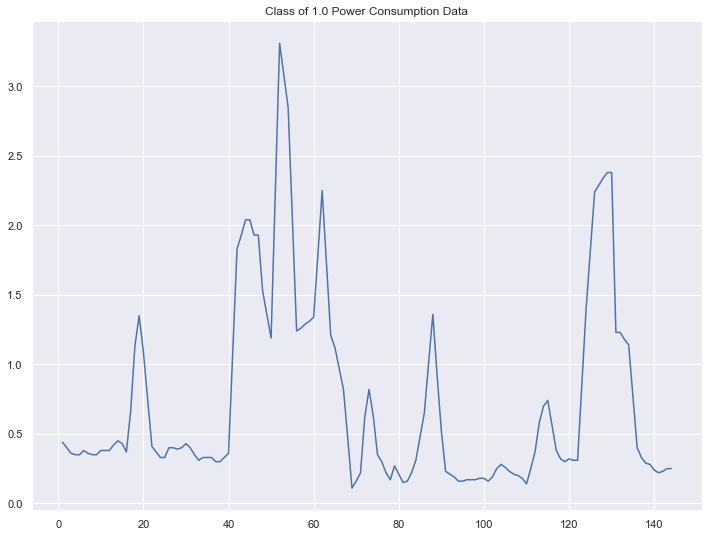

In [79]:
sns.lineplot(y = power_train.iloc[0].values, x = power_train.iloc[0].index);
plt.title(f"Class of {train_classes[0]} Power Consumption Data")
plt.show();

In [80]:
performance,cv = pipeline(power_train,power_test,train_classes,test_classes)

Best K for Raw-Euclidean: 3  | Score: 0.9733333333333333

    Model : '3-NN with Euclidiean Distance'

    Confusion matrix : 
    0   1
0  88   2
1   4  86


    Accuracy : 0.9666666666666667


    
Best K for Raw-DTW: 1  | Score: 0.8722222222222221

    Model : '1-NN with DTW Distance'

    Confusion matrix : 
    0   1
0  48  42
1   1  89


    Accuracy : 0.7611111111111111


    
Best K for Raw-Manhattan: 3  | Score: 0.9688888888888889

    Model : '3-NN with Manhattan Distance'

    Confusion matrix : 
    0   1
0  89   1
1   7  83


    Accuracy : 0.9555555555555556


    
Best K for Raw-Minkowski: 1  | Score: 0.9411111111111109

    Model : '1-NN with Minkowski Distance'

    Confusion matrix : 
    0   1
0  87   3
1   1  89


    Accuracy : 0.9777777777777777


    
Best K for PCA-Euclidean 3  | Score: 0.9666666666666666
Best PCA Component Number: 5  | Score: 0.9666666666666666

    Model : '3-NN with PCA-Euclidean Distance'

    Confusion matrix : 
    0   1
0  77  13
1  20  7

In [81]:
performance

[['Euclidean | Raw ', 0.9666666666666667],
 ['Raw | DTW ', 0.7611111111111111],
 ['Manhattan | Raw ', 0.9555555555555556],
 ['Minkowski | Raw ', 0.9777777777777777],
 ['Euclidean | PCA ', 0.8166666666666667],
 ['DTW | PCA ', 1.0],
 ['Manhattan | PCA ', 0.8444444444444444],
 ['Minkowski | PCA ', 0.8111111111111111],
 ['Euclidean | SAX ', 0.7944444444444444],
 ['DTW | SAX ', 0.5],
 ['Manhattan | SAX ', 0.5],
 ['Minkowski | SAX ', 0.48333333333333334]]

In [82]:
cv

[['Best K for Raw-Euclidean:', 3, ' | Score:', 0.9733333333333333],
 ['Best K for Raw-DTW:', 1, ' | Score:', 0.8722222222222221],
 ['Best K for Raw-Manhattan:', 3, ' | Score:', 0.9688888888888889],
 ['Best K for Raw-Minkowski:', 1, ' | Score:', 0.9411111111111109],
 ['Best K for PCA-Euclidean:', 3, ' | Score:', 0.9666666666666666],
 ['Best K for PCA-DTW:', 1, ' | Score:', 0.9733333333333333],
 ['Best K for PCA-Manhattan:', 3, ' | Score:', 0.9677777777777777],
 ['Best K for PCA-Minkowski:', 3, ' | Score:', 0.9677777777777777],
 ['Best K for SAX-Euclidean:', 5, ' | Score:', 0.8044444444444444],
 ['Best K for SAX-DTW:', 1, ' | Score:', 0.6855555555555556],
 ['Best K for SAX-Manhattan:', 1, ' | Score:', 0.81],
 ['Best K for SAX-Minkowski:', 5, ' | Score:', 0.6422222222222221]]

## Fish Dataset

- A set of Fish outlines originally used with contour matching in the paper "Contour Matching for Fish Species Recognition and Migration Monitoring" by D. Lee. Each class is a different species. Outlines were derived at UCR.

In [83]:
fish_train = pd.read_csv("datasets/Fish_TRAIN.txt",sep=' ', header=None, skipinitialspace = True)
fish_test = pd.read_csv("datasets/Fish_TEST.txt", sep=' ', header=None, skipinitialspace = True)
train_classes = fish_train[0]
test_classes = fish_test[0]
fish_train.pop(0)
fish_test.pop(0)
fish_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463
0,1.950905,1.926654,1.895665,1.858015,1.820566,1.790278,1.767617,1.731273,1.695241,1.658904,1.622969,1.586888,1.557218,1.521723,1.486103,1.450451,1.414024,1.377698,1.341477,1.305365,1.269866,1.234773,1.198903,1.163301,1.126734,1.092243,1.056584,1.021037,0.985608,0.949550,0.914845,0.878732,0.842699,0.806750,0.770887,0.735115,0.699436,0.663854,0.626558,0.591141,0.553949,0.518710,0.481633,0.446428,0.409633,0.372735,0.335890,0.301224,0.264530,0.227900,0.191337,0.154843,0.118483,0.082080,0.045819,0.009642,-0.026445,-0.062437,-0.098329,-0.134116,-0.169793,-0.205352,-0.240787,-0.276091,-0.311257,-0.346274,-0.381135,-0.415831,-0.450349,-0.478300,-0.509002,-0.539318,-0.564218,-0.587825,-0.608970,-0.631308,-0.651840,-0.666251,-0.681116,-0.694336,-0.704914,-0.714660,-0.722938,-0.729711,-0.740284,-0.750517,-0.757599,-0.770139,-0.782312,-0.790510,-0.794266,-0.801910,-0.807579,-0.823250,-0.837932,-0.867762,-0.906599,-0.943262,-0.981113,-1.016899,-1.052481,-1.087837,-1.130372,-1.177868,-1.211777,-1.250405,-1.289208,-1.334231,-1.371315,-1.398161,-1.428367,-1.441949,-1.460058,-1.469578,-1.483530,-1.495260,-1.497946,-1.504685,-1.509017,-1.504035,-1.503230,-1.499850,-1.487898,-1.479326,-1.468758,-1.455965,-1.435396,-1.418746,-1.400286,-1.378938,-1.353618,-1.330745,-1.306582,-1.281246,-1.254845,-1.224353,-1.199217,-1.170163,-1.140379,-1.109933,-1.078885,-1.047287,-1.012339,-0.979906,-0.946653,-0.911272,-0.875322,-0.837113,-0.795815,-0.752398,-0.711697,-0.671515,-0.634280,-0.595656,-0.557000,-0.518315,-0.481857,-0.443094,-0.406489,-0.367660,-0.335085,-0.304668,-0.284529,-0.267411,-0.242857,-0.237289,-0.250981,-0.283063,-0.323066,-0.321817,-0.285529,-0.249044,-0.211549,-0.174262,-0.137098,-0.099367,-0.061820,-0.024350,0.014162,0.052106,0.090096,0.128642,0.167191,0.206259,0.245333,0.284968,0.324122,0.363759,0.403150,0.443273,0.482946,0.522940,0.562926,0.604142,0.644683,0.685289,0.726112,0.768552,0.802485,0.843556,0.885015,0.926384,0.966720,1.007667,1.048572,1.088973,1.128867,1.168645,1.208953,1.247159,1.284110,1.311772,1.332843,1.313912,1.295370,1.277226,1.264386,1.248935,1.232025,1.222333,1.213077,1.204264,1.195895,1.174344,1.153242,1.123528,1.091862,1.060674,1.023164,0.993112,1.006748,1.025020,1.054667,1.083260,1.112004,1.140770,1.16575

In [84]:
fish_test.shape

(175, 463)

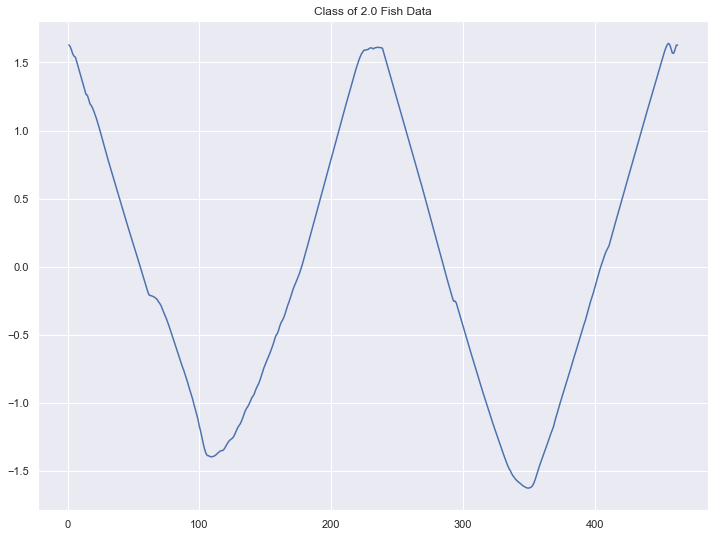

In [85]:
sns.lineplot(y = fish_train.iloc[31].values, x = fish_train.iloc[78].index);
plt.title(f"Class of {train_classes[31]} Fish Data")
plt.show();

In [86]:
performance,cv = pipeline(fish_train,fish_test,train_classes,test_classes)

Best K for Raw-Euclidean: 5  | Score: 0.7753594771241831

    Model : '5-NN with Euclidiean Distance'

    Confusion matrix : 
    0   1   2   3   4   5   6
0  13   1   6   0   0   3   1
1   1  21   2   1   0   0   0
2   1   0  18   1   0   1   1
3   2   0   1  21   0   3   2
4   0   0   6   1  21   0   0
5   6   0   2   2   0  14   1
6   1   0   2   0   0   1  18


    Accuracy : 0.72


    
Best K for Raw-DTW: 1  | Score: 0.7337908496732025

    Model : '1-NN with DTW Distance'

    Confusion matrix : 
    0  1   2  3  4   5  6
0   8  0   7  0  0   9  0
1   9  0   6  0  0  10  0
2   6  0   5  0  0  11  0
3   7  0  15  0  0   7  0
4  16  0  11  0  0   1  0
5  16  0   5  0  0   4  0
6  17  0   5  0  0   0  0


    Accuracy : 0.09714285714285714


    
Best K for Raw-Manhattan: 3  | Score: 0.7566666666666664

    Model : '3-NN with Manhattan Distance'

    Confusion matrix : 
    0   1   2   3   4   5   6
0  16   0   5   0   0   2   1
1   0  23   1   0   0   0   1
2   1   0  18   1   0 

In [87]:
performance

[['Euclidean | Raw ', 0.72],
 ['Raw | DTW ', 0.09714285714285714],
 ['Manhattan | Raw ', 0.7542857142857143],
 ['Minkowski | Raw ', 0.7942857142857143],
 ['Euclidean | PCA ', 0.42857142857142855],
 ['DTW | PCA ', 0.13142857142857142],
 ['Manhattan | PCA ', 0.42857142857142855],
 ['Minkowski | PCA ', 0.49142857142857144],
 ['Euclidean | SAX ', 0.44],
 ['DTW | SAX ', 0.13142857142857142],
 ['Manhattan | SAX ', 0.5714285714285714],
 ['Minkowski | SAX ', 0.2742857142857143]]

In [88]:
cv

[['Best K for Raw-Euclidean:', 5, ' | Score:', 0.7753594771241831],
 ['Best K for Raw-DTW:', 1, ' | Score:', 0.7337908496732025],
 ['Best K for Raw-Manhattan:', 3, ' | Score:', 0.7566666666666664],
 ['Best K for Raw-Minkowski:', 1, ' | Score:', 0.746732026143791],
 ['Best K for PCA-Euclidean:', 1, ' | Score:', 0.6167973856209151],
 ['Best K for PCA-DTW:', 3, ' | Score:', 0.6056862745098041],
 ['Best K for PCA-Manhattan:', 3, ' | Score:', 0.6082352941176471],
 ['Best K for PCA-Minkowski:', 5, ' | Score:', 0.6009803921568628],
 ['Best K for SAX-Euclidean:', 1, ' | Score:', 0.6889542483660133],
 ['Best K for SAX-DTW:', 1, ' | Score:', 0.14437908496732027],
 ['Best K for SAX-Manhattan:', 5, ' | Score:', 0.6814379084967319],
 ['Best K for SAX-Minkowski:', 5, ' | Score:', 0.3502614379084968]]

## ECG Dataset

- This dataset was formatted by R. Olszewski as part of his thesis "Generalized feature extraction for structural pattern recognition in time-series data" at Carnegie Mellon University, 2001. Each series traces the electrical activity recorded during one heartbeat. The two classes are a normal heartbeat and a Myocardial Infarction.

In [89]:
ecg_train = pd.read_csv("datasets/ECG200_TRAIN.txt",sep=' ', header=None, skipinitialspace = True)
ecg_test = pd.read_csv("datasets/ECG200_TEST.txt.txt", sep=' ', header=None, skipinitialspace = True)
train_classes = ecg_train[0]
test_classes = ecg_test[0]
ecg_train.pop(0)
ecg_test.pop(0)
ecg_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96
0,0.502055,0.542163,0.722383,1.428885,2.136516,2.281149,1.936274,1.468890,1.008845,0.380282,-0.296780,-0.513929,-0.255645,-0.107203,-0.287827,-0.418009,-0.319163,-0.260379,-0.350357,-0.505486,-0.710887,-0.823920,-0.899702,-1.153950,-1.229831,-1.044091,-1.202031,-1.392195,-1.130108,-1.179867,-1.649272,-1.726575,-1.608370,-1.662802,-1.650672,-1.697309,-1.838697,-1.802596,-1.780536,-1.825166,-1.644763,-1.423810,-1.392195,-1.360416,-1.200178,-0.918632,-0.685916,-0.667943,-0.512722,-0.101691,0.063954,0.082614,0.237607,0.174793,0.123205,0.503394,0.683870,0.474995,0.532797,0.723550,0.664420,0.647936,0.757054,0.732072,0.620215,0.606297,0.677950,0.689084,0.598807,0.542647,0.581807,0.630631,0.664420,0.686318,0.657383,0.650889,0.721738,0.739706,0.691481,0.695229,0.750115,0.853845,0.916019,0.827750,0.880906,1.088831,0.931043,0.610298,0.638894,0.684679,0.583238,0.640522,0.708585,0.705011,0.713815,0.433765
1,0.147647,0.804668,0.367771,0.243894,0.026614,-0.274402,0.096731,-0.747731,-1.609777,-1.179593,-1.055926,-1.128777,-0.686039,-0.798789,-1.714279,-1.649858,-1.032699,-1.423918,-1.782433,-1.025126,-1.798909,-1.793614,-1.085478,-1.574390,-1.036059,-2.130021,-2.038621,-0.055013,-1.140195,-0.704275,0.048723,-0.475854,0.525865,0.244778,0.679932,0.928601,0.573041,1.231607,1.043324,1.580228,1.290571,0.750518,0.977567,1.141588,1.529904,0.847682,0.766760,0.565682,1.084626,1.057368,0.503084,0.953288,0.454198,1.198970,0.849720,-0.137715,0.631120,0.694075,0.515071,0.559229,0.555712,0.469694,0.388821,0.343129,0.535598,0.900708,0.656846,0.690033,0.952596,0.547770,-0.167693,0.011532,-0.176488,-0.277706,-0.224836,-0.910723,-0.037932,0.071668,-1.048920,-0.636218,-0.386637,-0.507512,-0.716656,-0.463758,-0.460442,-0.770792,-0.533503,-0.400228,0.176084,1.111768,2.438428,2.734889,1.736054,0.036857,-1.265074,-0.208024
2,0.316646,0.243199,0.370471,1.063738,1.678187,1.759558,1.697717,1.612159,1.168188,0.499957,-0.022363,-0.235318,-0.118273,-0.071027,-0.322986,-0.433562,-0.318660,-0.295655,-0.417733,-0.682480,-0.881840,-0.843320,-0.883652,-1.030018,-1.055265,-1.168637,-1.363991,-1.337611,-1.261294,-1.409782,-1.634504,-1.703238,-1.677025,-1.782628,-1.996872,-2.056372,-1.937881,-1.879412,-1.915427,-1.845507,-1.658135,-1.509483,-1.393426,-1.232868,-1.024348,-0.768640,-0.511294,-0.309564,-0.131962,0.035054,0.142159,0.225807,0.343690,0.428589,0.469568,0.569782,0.675666,0.699885,0.732561,0.771665,0.738129,0.723700,0.806876,0.878984,0.855791,0.806384,0.792501,0.803814,0.781938,0.700439,0.735960,0.864162,0.707670,0.458756,0.600146,0.825136,0.800034,0.762821,0.755443,0.653766,0.526441,0.477339,0.574946,0.698425,0.722414,0.771598,0.764229,0.610621,0.552900,0.566786,0.604002,0.777068,0.812345,0.748848,0.818042,0.539347
3,1.168874,2.075901,1.760141,1.606446,1.949046,1.302842,0.459332,0.516412,0.852180,0.989227,0.821253,0.576448,0.743089,0.852970,0.307458,-0.130391,-0.062200,-0.100727,-0.232818,-0.234465,-0.214756,-0.230413,-0.227551,-0.231002,-0.463479,-0.724215,-0.787885,-0.986687,-1.224672,-1.288142,-1.364148,-1.428221,-1.501767,-1.648084,-1.705836,-1.686791,-1.705719,-1.777683,-1.869313,-1.858376,-1.737717,-1.729149,-1.728105,-1.546037,-1.459102,-1.410752,-1.163427,-0.907419,-0.716211,-0.581763,-0.442526,-0.207046,-0.026463,0.117036,0.220637,0.264315,0.405055,0.464974,0.434163,0.486807,0.439388,0.369611,0.413149,0.397895,0.318764,0.263717,0.288863,0.358244,0.326737,0.229215,0.204418,0.244386,0.262632,0.243885,0.227502,0.245785,0.232959,0.164611,0.171538,0.166690,0.099141,0.146937,0.133414,0.125294,0.202713,0.186409,0.419006,0.723888,1.323947,2.136488,1.746597,1.470220,1.893512,1.256949,0.800407,0.731540
4,0.648658,0.752026,2.636231,3.455716,2.118157,0.520620,-0.188627,0.780818,0.933775,0.701402,1.

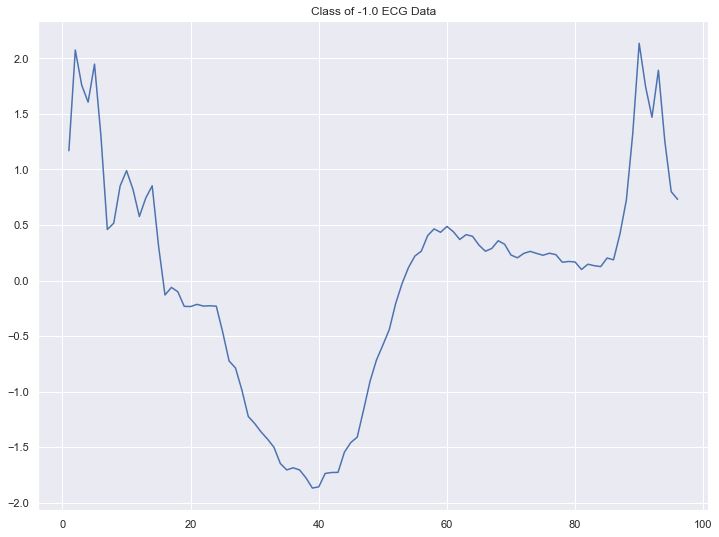

In [90]:
sns.lineplot(y = ecg_train.iloc[3].values, x = ecg_train.iloc[3].index);
plt.title(f"Class of {train_classes[3]} ECG Data")
plt.show();

In [91]:
performance,cv = pipeline(ecg_train,ecg_test,train_classes,test_classes)

Best K for Raw-Euclidean: 3  | Score: 0.894

    Model : '3-NN with Euclidiean Distance'

    Confusion matrix : 
    0   1
0  29   7
1   3  61


    Accuracy : 0.9


    
Best K for Raw-DTW: 5  | Score: 0.8100000000000003

    Model : '5-NN with DTW Distance'

    Confusion matrix : 
    0   1
0  13  23
1  17  47


    Accuracy : 0.6


    
Best K for Raw-Manhattan: 1  | Score: 0.848

    Model : '1-NN with Manhattan Distance'

    Confusion matrix : 
    0   1
0  29   7
1   4  60


    Accuracy : 0.89


    
Best K for Raw-Minkowski: 3  | Score: 0.87

    Model : '3-NN with Minkowski Distance'

    Confusion matrix : 
    0   1
0  25  11
1   4  60


    Accuracy : 0.85


    
Best K for PCA-Euclidean 1  | Score: 0.8819999999999999
Best PCA Component Number: 5  | Score: 0.8440000000000001

    Model : '1-NN with PCA-Euclidean Distance'

    Confusion matrix : 
    0   1
0  21  15
1   8  56


    Accuracy : 0.77


    
Best K for PCA-DTW 3  | Score: 0.8480000000000001

    Model : '3-N

In [92]:
performance

[['Euclidean | Raw ', 0.9],
 ['Raw | DTW ', 0.6],
 ['Manhattan | Raw ', 0.89],
 ['Minkowski | Raw ', 0.85],
 ['Euclidean | PCA ', 0.77],
 ['DTW | PCA ', 0.57],
 ['Manhattan | PCA ', 0.76],
 ['Minkowski | PCA ', 0.67],
 ['Euclidean | SAX ', 0.78],
 ['DTW | SAX ', 0.51],
 ['Manhattan | SAX ', 0.78],
 ['Minkowski | SAX ', 0.84]]

In [94]:
cv

[['Best K for Raw-Euclidean:', 3, ' | Score:', 0.894],
 ['Best K for Raw-DTW:', 5, ' | Score:', 0.8100000000000003],
 ['Best K for Raw-Manhattan:', 1, ' | Score:', 0.848],
 ['Best K for Raw-Minkowski:', 3, ' | Score:', 0.87],
 ['Best K for PCA-Euclidean:', 1, ' | Score:', 0.8819999999999999],
 ['Best K for PCA-DTW:', 3, ' | Score:', 0.8480000000000001],
 ['Best K for PCA-Manhattan:', 1, ' | Score:', 0.8540000000000001],
 ['Best K for PCA-Minkowski:', 1, ' | Score:', 0.852],
 ['Best K for SAX-Euclidean:', 1, ' | Score:', 0.8460000000000001],
 ['Best K for SAX-DTW:', 1, ' | Score:', 0.7120000000000001],
 ['Best K for SAX-Manhattan:', 1, ' | Score:', 0.8440000000000001],
 ['Best K for SAX-Minkowski:', 5, ' | Score:', 0.7919999999999999]]

## Large Kitchen Appliances Dataset

In [95]:
lka_train = pd.read_csv("datasets/LargeKitchenAppliances_TRAIN.txt",sep=' ', header=None, skipinitialspace = True)
lka_test = pd.read_csv("datasets/LargeKitchenAppliances_TEST.txt", sep=' ', header=None, skipinitialspace = True)
train_classes = lka_train[0]
test_classes = lka_test[0]
lka_train.pop(0)
lka_test.pop(0)
lka_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720
0,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.099108,-0.09

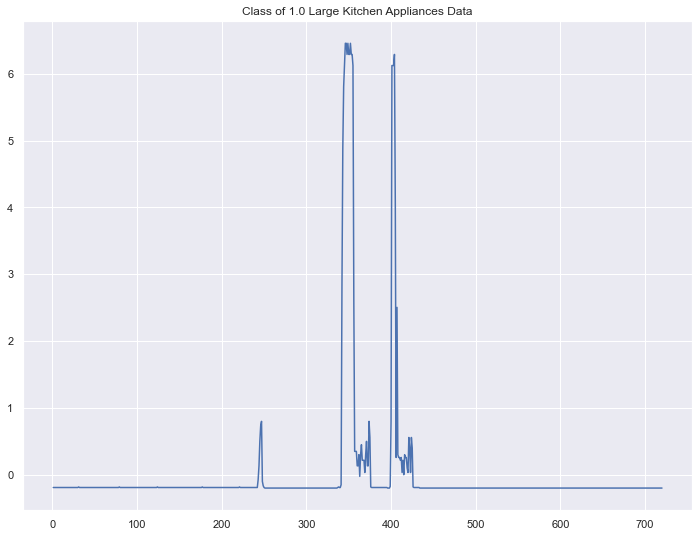

In [97]:
sns.lineplot(y = lka_train.iloc[5].values, x = lka_train.iloc[3].index);
plt.title(f"Class of {train_classes[5]} Large Kitchen Appliances Data")
plt.show();

In [ ]:
performance,cv = pipeline(lka_train,lka_test,train_classes,test_classes)

Best K for Raw-Euclidean: 1  | Score: 0.6000284495021337

    Model : '1-NN with Euclidiean Distance'

    Confusion matrix : 
    0   1   2
0  56  33  36
1  32  53  40
2  27  22  76


    Accuracy : 0.49333333333333335


    
Best K for Raw-DTW: 1  | Score: 0.8132432432432433

    Model : '1-NN with DTW Distance'

    Confusion matrix : 
    0    1   2
0  24   91  10
1  16  108   1
2  13   90  22


    Accuracy : 0.4106666666666667


    
Best K for Raw-Manhattan: 1  | Score: 0.675135135135135

    Model : '1-NN with Manhattan Distance'

    Confusion matrix : 
    0   1   2
0  68  26  31
1  28  66  31
2  24  26  75


    Accuracy : 0.5573333333333333


    
Best K for Raw-Minkowski: 3  | Score: 0.4753342816500711

    Model : '3-NN with Minkowski Distance'

    Confusion matrix : 
    0   1   2
0  40  29  56
1  17  32  76
2  15  23  87


    Accuracy : 0.424


    
Best K for PCA-Euclidean 3  | Score: 0.6172546230440967
Best PCA Component Number: 3  | Score: 0.5903129445234708

    M

In [ ]:
performance

In [ ]:
cv

## Plane Figures Dataset
- A data set of plane outlines , classes shown below

In [ ]:
plane_train = pd.read_csv("datasets/Plane_TRAIN.txt",sep=' ', header=None, skipinitialspace = True)
plane_test = pd.read_csv("datasets/Plane_TEST.txt", sep=' ', header=None, skipinitialspace = True)
train_classes = plane_train[0]
test_classes = plane_test[0]
plane_train.pop(0)
plane_test.pop(0)
plane_test.head()

In [ ]:
sns.lineplot(y = plane_train.iloc[5].values, x = plane_train.iloc[3].index);
plt.title(f"Class of {train_classes[5]} Plane Figures Data")
plt.show();

In [ ]:
performance,cv = pipeline(plane_train,plane_test,train_classes,test_classes)

In [ ]:
performance

In [ ]:
cv